# 0) Import packages

In [7]:
#Import packages
import random # random generator
import networkx as nx # network 
import matplotlib.pyplot as plt # drawing
import numpy as np # Matrices

# 1) Introduction

The aim of today is to understand a network through the distribution of centralities.

We will focus during this session on computing the degree of each nodes and then compute the cumulative distributions.

The plan is the following

- for each node compute its degrees

- compute the list of centralities for every node in the graph

- plot has an histogram

The same approach can be used for any local notions defined for every node.

The last part that is optional. We will investigate the size of the largest component in the graph if the graph is suffering from error (nodes disapear uniformly) or from an attack (nodse with higher degree are disappearing with higher probability).


# 2) Project (week 2)

Depending on what seems more relevant in your graph, pick one of the following local notions

- Decay centrality

- Betweeness centrality

- Closeness centrality

- Clustering

- Any other notions that you invent


1) Provide a code computing the given centrality using basic functions of networkx (you are not allowed to use directly nx."what you want").

2) Discuss why you picked this measure and who is the most central in your network based on your choice.

3) Provide the cumulative distribution for this centrality and give a graphical representation of your graph (log-log, log or normal representation as you think it is more relevant). 

# 3) Definition of the graph

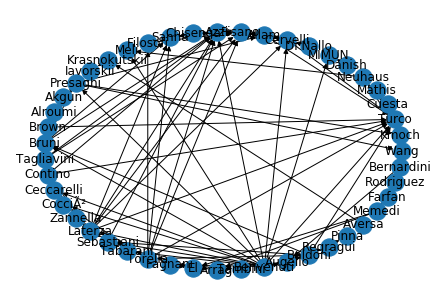

In [8]:
sna_advice=[('Wang', 'Kmoch'), ('Wang', 'Turco'), ('Kmoch', 'Cuesta'), ('Kmoch', 'Mathis'), ('Kmoch', 'Kmoch'), ('Kmoch', 'Neuhaus'), ('Kmoch', 'Wang'), ('Danish', 'MIMUN'), ('Di Nallo', 'Cervelli'), ('Cervelli', 'Allam'), ('Cervelli', 'Pisano'), ('Cervelli', 'Turco'), ('Allam', 'Cervelli'), ('Allam', 'Pisano'), ('Allam', 'Turco'), ('Pisano', 'Azzi'), ('Chisenga', 'Chisenga'), ('Chisenga', 'Pisano'), ('Azzi', 'Sanna'), ('Filosofi', 'Pisano'), ('Neuhaus', 'Meli'), ('Neuhaus', 'Turco'), ('Krasnokutskii', 'Iavorskii'), ('Krasnokutskii', 'Krasnokutskii'), ('Presaghi', 'Akgun'), ('Presaghi', 'Allam'), ('Presaghi', 'Alroumi'), ('Presaghi', 'Brown'), ('Presaghi', 'Bruni'), ('Presaghi', 'Kmoch'), ('Presaghi', 'Wang'), ('Brown', 'Turco'), ('Bruni', 'Azzi'), ('Bruni', 'Sanna'), ('Tagliavini', 'Azzi'), ('Tagliavini', 'Pisano'), ('Contino', 'Azzi'), ('Contino', 'Ceccarelli'), ('Contino', 'CocciÃ²'), ('Contino', 'Contino'), ('Contino', 'Turco'), ('Contino', 'Zannella'), ('Laterza', 'Azzi'), ('Laterza', 'Cervelli'), ('Laterza', 'Contino'), ('Laterza', 'Pisano'), ('Laterza', 'Sanna'), ('Laterza', 'Sebastiani'), ('Laterza', 'Tabarani'), ('Laterza', 'Turco'), ('Laterza', 'Zannella'), ('Sanna', 'Azzi'), ('Sebastiani', 'Azzi'), ('Torella', 'Azzi'), ('Torella', 'CocciÃ²'), ('Torella', 'Filosofi'), ('Torella', 'Pisano'), ('Torella', 'Sanna'), ('Torella', 'Turco'), ('Fagnani', 'El'), ('Fagnani', 'Arrag'), ('Fagnani', 'Tambini'), ('Benvenuti', 'Augello'), ('Benvenuti', 'Azzi'), ('Benvenuti', 'Baldoni'), ('Benvenuti', 'Bruni'), ('Benvenuti', 'Ceccarelli'), ('Benvenuti', 'Cervelli'), ('Benvenuti', 'CocciÃ²'), ('Benvenuti', 'Fagnani'), ('Benvenuti', 'Laterza'), ('Benvenuti', 'Meli'), ('Benvenuti', 'MIMUN'), ('Benvenuti', 'Presaghi'), ('Benvenuti', 'Regragui'), ('Benvenuti', 'Sebastiani'), ('Benvenuti', 'Tabarani'), ('Benvenuti', 'Turco'), ('Baldoni', 'Bruni'), ('Baldoni', 'Pinna'), ('Baldoni', 'Sebastiani'), ('Baldoni', 'Torella'), ('Baldoni', 'Turco'), ('Aversa', 'Krasnokutskii'), ('Memedi', 'El'), ('Memedi', 'Arrag'), ('Memedi', 'Farfan'), ('Memedi', 'Rodriguez'), ('Bernardini', 'Augello')]

G_SNA=nx.DiGraph()
G_SNA.add_edges_from(sna_advice)
N_SNA=G_SNA.number_of_nodes()

nx.draw_circular(G_SNA,with_labels='True')

list_of_names=['Wang', 'Kmoch', 'Turco', 'Danish', 'MIMUN', 'Di Nallo', 'Cervelli', 'Allam', 'Pisano', 'Chisenga', 'Azzi', 'Filosofi', 'Cuesta', 'Mathis', 'Neuhaus', 'Meli', 'Krasnokutskii', 'Iavorskii', 'Presaghi', 'Akgun', 'Alroumi', 'Brown', 'Bruni', 'Tagliavini', 'Contino', 'Ceccarelli', 'CocciÃ²', 'Zannella', 'Laterza', 'Sanna', 'Sebastiani', 'Tabarani', 'Torella', 'Fagnani', 'El', 'Arrag', 'Tambini', 'Benvenuti', 'Augello', 'Baldoni', 'Regragui', 'Aversa', 'Memedi', 'Farfan', 'Rodriguez', 'Pinna', 'Bernardini']


# 4) Degree centrality

### Computing the centrality of one node

The functions are voluntarily not using some functions of networkx to allow you to adapt it later to any centrality measure

In [9]:
#degrees and histogram
def indegs_fun(G,j):
    A = nx.adjacency_matrix(G)
    N=G.number_of_nodes()
    
    count=0
    
    for i in range(N):
        count=count+A[i,j]
    
    Result=count
    
    return Result

In [10]:
indegs_fun(G_SNA,0)

2

###  Computing the list of centralities

In [11]:
data_centralities=[]

for i in range(N_SNA):
    data_centralities.append(indegs_fun(G_SNA,i))
    
print(data_centralities)

[2, 3, 10, 1, 1, 1, 0, 2, 0, 4, 2, 7, 9, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 3, 0, 2, 2, 3, 2, 1, 3, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0]


### Ploting the centralities

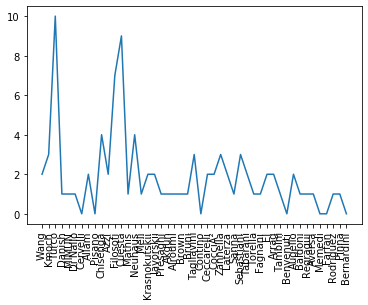

In [12]:
plt.xticks(rotation=90)
plt.plot(list_of_names,data_centralities)

### Who is the most central?

In [13]:
value_max=max(data_centralities) # max value
index_max=data_centralities.index(value_max) # index of the max value
name_max=list_of_names[index_max] # name of the person
print('And the winner is:'+name_max)

And the winner is:Turco


### Plot the histogram

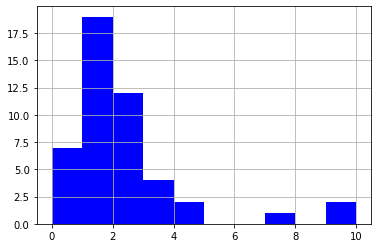

In [14]:
p = plt.hist(data_centralities, facecolor='blue')  #histogram of the date set degs
plt.grid(True)
plt.show()

In [15]:
# How to do it by hand ?

### Cumulative_distributions

We need to find the x-axis (where the cdf change) and the value for each x

In [25]:
#x-axis

list_values=list(set(data_centralities)) # get the list of values without repetition
list_values.sort() #sort them in increasing order
cdf_x=list_values #these are the values where the cdf change
print(cdf_x)


[0, 1, 2, 3, 4, 7, 9, 10]


In [26]:
# y-axis is a vector of the same length such that for each value, we compute how many values are above. 
# We can use a loop or use some clever trick of python to have implicit loop

cdf_y=[]  # list of y-axis

for x in cdf_x:  # check each value
    y=sum(test>=x for test in data_centralities) # count how many element in data_centralities are aboe it
    cdf_y.append(y) # add it to the list

print(cdf_y)


[47, 40, 21, 9, 5, 3, 2, 1]


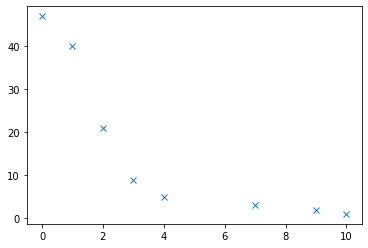

In [27]:
plt.plot(cdf_x,cdf_y,"x")

### Using the centrality to improve graph representation

We want to use the centrality to change the size of the nodes.

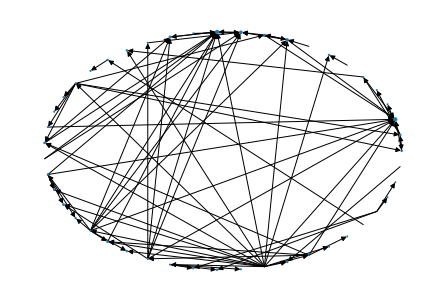

In [14]:
pos=nx.circular_layout(G_SNA)
nx.draw(G_SNA,pos, node_size=data_centralities, with_labels=False)     # Notice the new parameter node_size that rescale
plt.show()

The node size are too small leading to a graph that is not really visible. We need to rescale the centralities to be better readable on the graph

In [15]:
data_centralities_rescaled=[(3*i)**2 for i in data_centralities] # make a list of element equal to (i*100)**2 where i is going through the list degs

In [1]:
pos=nx.circular_layout(G_SNA)
nx.draw(G_SNA,pos, node_size=data_centralities_rescaled, with_labels=True)     # Notice the new parameter node_size that rescale
plt.show()

NameError: name 'nx' is not defined

Remark: 

It is also possible to use directly the function from networkx to obtain the list of degree.

There is nevertheless a problem since one obtain a format that can not be used as a parameter for the node size.

In [17]:
degs_networkx=nx.degree_centrality(G_SNA) ## It is normalized degree centrality
print(degs_networkx)

{'Wang': 0.08695652173913043, 'Kmoch': 0.17391304347826086, 'Turco': 0.21739130434782608, 'Cuesta': 0.021739130434782608, 'Mathis': 0.021739130434782608, 'Neuhaus': 0.06521739130434782, 'Danish': 0.021739130434782608, 'MIMUN': 0.043478260869565216, 'Di Nallo': 0.021739130434782608, 'Cervelli': 0.15217391304347827, 'Allam': 0.10869565217391304, 'Pisano': 0.17391304347826086, 'Azzi': 0.21739130434782608, 'Chisenga': 0.06521739130434782, 'Sanna': 0.10869565217391304, 'Filosofi': 0.043478260869565216, 'Meli': 0.043478260869565216, 'Krasnokutskii': 0.08695652173913043, 'Iavorskii': 0.021739130434782608, 'Presaghi': 0.17391304347826086, 'Akgun': 0.021739130434782608, 'Alroumi': 0.021739130434782608, 'Brown': 0.043478260869565216, 'Bruni': 0.10869565217391304, 'Tagliavini': 0.043478260869565216, 'Contino': 0.17391304347826086, 'Ceccarelli': 0.043478260869565216, 'CocciÃ²': 0.06521739130434782, 'Zannella': 0.043478260869565216, 'Laterza': 0.21739130434782608, 'Sebastiani': 0.08695652173913043,

TypeError: loop of ufunc does not support argument 0 of type dict which has no callable sqrt method

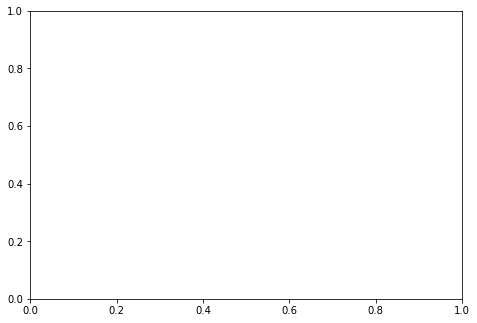

In [19]:
nx.draw(G_SNA,pos, node_size=degs_networkx, with_labels=True)     # Notice the new parameter node_size that rescale
plt.show()

In [ ]:
# How to solve ?

# 4) Other centralities

https://networkx.org/documentation/stable/reference/algorithms/centrality.html

# 5) Robustness (optional code)

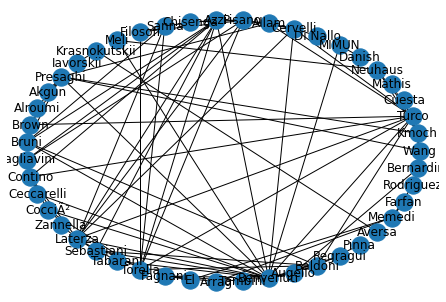

In [28]:
sna_advice=[('Wang', 'Kmoch'), ('Wang', 'Turco'), ('Kmoch', 'Cuesta'), ('Kmoch', 'Mathis'), ('Kmoch', 'Kmoch'), ('Kmoch', 'Neuhaus'), ('Kmoch', 'Wang'), ('Danish', 'MIMUN'), ('Di Nallo', 'Cervelli'), ('Cervelli', 'Allam'), ('Cervelli', 'Pisano'), ('Cervelli', 'Turco'), ('Allam', 'Cervelli'), ('Allam', 'Pisano'), ('Allam', 'Turco'), ('Pisano', 'Azzi'), ('Chisenga', 'Chisenga'), ('Chisenga', 'Pisano'), ('Azzi', 'Sanna'), ('Filosofi', 'Pisano'), ('Neuhaus', 'Meli'), ('Neuhaus', 'Turco'), ('Krasnokutskii', 'Iavorskii'), ('Krasnokutskii', 'Krasnokutskii'), ('Presaghi', 'Akgun'), ('Presaghi', 'Allam'), ('Presaghi', 'Alroumi'), ('Presaghi', 'Brown'), ('Presaghi', 'Bruni'), ('Presaghi', 'Kmoch'), ('Presaghi', 'Wang'), ('Brown', 'Turco'), ('Bruni', 'Azzi'), ('Bruni', 'Sanna'), ('Tagliavini', 'Azzi'), ('Tagliavini', 'Pisano'), ('Contino', 'Azzi'), ('Contino', 'Ceccarelli'), ('Contino', 'CocciÃ²'), ('Contino', 'Contino'), ('Contino', 'Turco'), ('Contino', 'Zannella'), ('Laterza', 'Azzi'), ('Laterza', 'Cervelli'), ('Laterza', 'Contino'), ('Laterza', 'Pisano'), ('Laterza', 'Sanna'), ('Laterza', 'Sebastiani'), ('Laterza', 'Tabarani'), ('Laterza', 'Turco'), ('Laterza', 'Zannella'), ('Sanna', 'Azzi'), ('Sebastiani', 'Azzi'), ('Torella', 'Azzi'), ('Torella', 'CocciÃ²'), ('Torella', 'Filosofi'), ('Torella', 'Pisano'), ('Torella', 'Sanna'), ('Torella', 'Turco'), ('Fagnani', 'El'), ('Fagnani', 'Arrag'), ('Fagnani', 'Tambini'), ('Benvenuti', 'Augello'), ('Benvenuti', 'Azzi'), ('Benvenuti', 'Baldoni'), ('Benvenuti', 'Bruni'), ('Benvenuti', 'Ceccarelli'), ('Benvenuti', 'Cervelli'), ('Benvenuti', 'CocciÃ²'), ('Benvenuti', 'Fagnani'), ('Benvenuti', 'Laterza'), ('Benvenuti', 'Meli'), ('Benvenuti', 'MIMUN'), ('Benvenuti', 'Presaghi'), ('Benvenuti', 'Regragui'), ('Benvenuti', 'Sebastiani'), ('Benvenuti', 'Tabarani'), ('Benvenuti', 'Turco'), ('Baldoni', 'Bruni'), ('Baldoni', 'Pinna'), ('Baldoni', 'Sebastiani'), ('Baldoni', 'Torella'), ('Baldoni', 'Turco'), ('Aversa', 'Krasnokutskii'), ('Memedi', 'El'), ('Memedi', 'Arrag'), ('Memedi', 'Farfan'), ('Memedi', 'Rodriguez'), ('Bernardini', 'Augello')]

G_undirected_SNA=nx.Graph() # Create a graph not a directed one
G_undirected_SNA.add_edges_from(sna_advice)
N_SNA=G_SNA.number_of_nodes()

nx.draw_circular(G_SNA,with_labels='True')

list_of_names=['Wang', 'Kmoch', 'Turco', 'Danish', 'MIMUN', 'Di Nallo', 'Cervelli', 'Allam', 'Pisano', 'Chisenga', 'Azzi', 'Filosofi', 'Cuesta', 'Mathis', 'Neuhaus', 'Meli', 'Krasnokutskii', 'Iavorskii', 'Presaghi', 'Akgun', 'Alroumi', 'Brown', 'Bruni', 'Tagliavini', 'Contino', 'Ceccarelli', 'CocciÃ²', 'Zannella', 'Laterza', 'Sanna', 'Sebastiani', 'Tabarani', 'Torella', 'Fagnani', 'El', 'Arrag', 'Tambini', 'Benvenuti', 'Augello', 'Baldoni', 'Regragui', 'Aversa', 'Memedi', 'Farfan', 'Rodriguez', 'Pinna', 'Bernardini']

G=G_undirected_SNA

We want now to investigate how much the graph is robust with respect to the deletion of nodes. We investigate the connectivity by the size of the largest component.

We will investigate two different perturbations:

- error: randomized uniformly. All nodes have the same probability to fail

- attacks: the attacker prefer to attack nodes that are central (notion of centrality need to be chosen)

### a) Error

We define a process updating the graph and deleting progressively nodes

In [29]:
def robustness_uniform(G):
    
    H=G.copy()  # We want a copy to work with. Without the copy, we would change the graph and forget the original graph.
    
    N=H.number_of_nodes()
    list=[]
    
    for n in range(N-1):
        
        Nodes=H.nodes()   # find the list of remaining nodes
        i=random.sample(Nodes,1)[0]  # pick one of them 
        
        H.remove_node(i)  # take it out
        
        largest_cc=max(nx.connected_components(H), key=len) # what is the largest component

        len_largest_cc=len(largest_cc)
        
        list.append(len_largest_cc)
    
    return list

In [30]:
G.nodes()

NodeView(('Wang', 'Kmoch', 'Turco', 'Cuesta', 'Mathis', 'Neuhaus', 'Danish', 'MIMUN', 'Di Nallo', 'Cervelli', 'Allam', 'Pisano', 'Azzi', 'Chisenga', 'Sanna', 'Filosofi', 'Meli', 'Krasnokutskii', 'Iavorskii', 'Presaghi', 'Akgun', 'Alroumi', 'Brown', 'Bruni', 'Tagliavini', 'Contino', 'Ceccarelli', 'CocciÃ²', 'Zannella', 'Laterza', 'Sebastiani', 'Tabarani', 'Torella', 'Fagnani', 'El', 'Arrag', 'Tambini', 'Benvenuti', 'Augello', 'Baldoni', 'Regragui', 'Pinna', 'Aversa', 'Memedi', 'Farfan', 'Rodriguez', 'Bernardini'))

In [31]:
list_robustness=robustness_uniform(G)

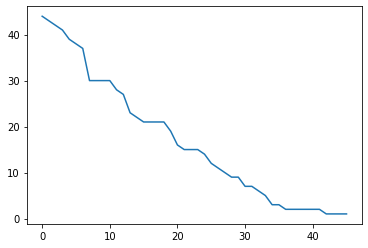

In [32]:
plt.plot(list_robustness)

## b) Average on trajectories

The previous compilation is made to be randomized. Depending on which nodes are chosen, we obtain different curves therefore it is not clear which part of the curve is due to the randomness and which part to the network.

To understand better, we do many simulations and we average on them the values to obtain a graph depending only on the network.

In [33]:
def statistical_uniform(G,L):

    data1=robustness_uniform(G)
    
    for l in range(L):
           
        data2=[]
        local=robustness_uniform(G)
        
        for a in range(len(local)):
            data2.append(local[a]+data1[a])
        
        data1=data2.copy()
                       
    Result=[i/(L+1) for i in data1]
    
    return Result

In [34]:
list_average=statistical_uniform(G,100)

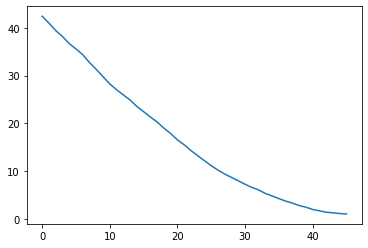

In [35]:
plt.plot(list_average)

## c) Attack

How to change the previous program pour une attaque ?

There are two options:

- a determinsitic one: delete nodes from higher centrality to lower

- a probabilistic one: pick randomly a node but with a probability distributions that depends on the relative centrality.


In [36]:
# We first define a way to transform a list of positive number into a probability distribution. One can do without (see book)

In [37]:
def list_to_proba(list):
    S=sum(list)
    
    if S==0:
        Result=[1/len(list) for i in list]
    else:
        Result=[i/S for i in list]
    
    return Result

In [38]:
list_to_proba([0,0,0])

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [39]:
def robustness_attack(G):
    
    H=G.copy()  # We want a copy to work with. Without the copy, we would change the graph and forget the original graph.
    
    N=H.number_of_nodes()
    list=[]
    
    
    for n in range(N-1):
        
        Nodes=H.nodes()   # Find remaining nodes
        Degrees=H.degree() # Find the degrees. Problem, one obtains name and degree
        List_degrees=[b for (a,b) in H.degree()] # Create a list of degree
        
   
        Proba=list_to_proba(List_degrees)

        i=np.random.choice(H.nodes(),1,p=Proba)[0]
        

        
        H.remove_node(i)
        
        largest_cc=max(nx.connected_components(H), key=len)

        len_largest_cc=len(largest_cc)
        
        list.append(len_largest_cc)
    
    return list

In [40]:
list_attack=robustness_attack(G)

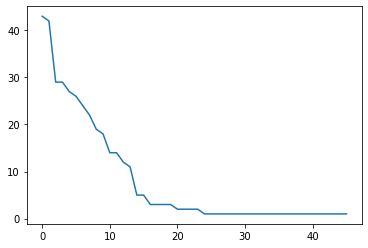

In [41]:
plt.plot(list_attack)

In [42]:
def statistical_attack(G,L):

    data3=robustness_attack(G)
    
    print(data3)
    for l in range(L):
           
        data2=[]
        local=robustness_attack(G)
        
        for a in range(len(local)):
            data2.append(local[a]+data3[a])
        
        data3=data2.copy()

    Result=[i/(L+1) for i in data3]
    
    return Result

In [43]:
liste_average_attack=statistical_attack(G,100)

[41, 28, 26, 24, 23, 22, 21, 19, 18, 18, 18, 18, 15, 15, 14, 13, 12, 12, 11, 5, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


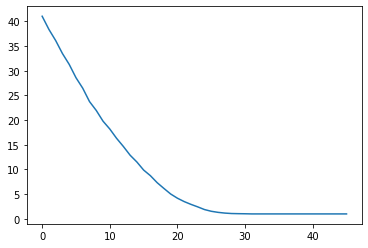

In [44]:
plt.plot(liste_average_attack)